# This is Housing Sale Prediction in which we are predicting the price of the House using Linear Regression

# 1) Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder

# 2) Loading of Training Dataset into Pandas DataFrame

In [2]:
train = pd.read_csv('train.csv',index_col="Id")

In [3]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

# 3) Preprocessing of Training Dataset

In [5]:
labelencoder = LabelEncoder()
MSZonings = labelencoder.fit_transform(train['MSZoning'])
Streets = labelencoder.fit_transform(train['Street'])
LotShapes = labelencoder.fit_transform(train['LotShape'])
LandContours = labelencoder.fit_transform(train['LandContour'])
Utilitiess = labelencoder.fit_transform(train['Utilities'])
LotConfigs = labelencoder.fit_transform(train['LotConfig'])
LandSlopes = labelencoder.fit_transform(train['LandSlope'])
Neighborhoods = labelencoder.fit_transform(train['Neighborhood'])
Condition1s = labelencoder.fit_transform(train['Condition1'])
Condition2s = labelencoder.fit_transform(train['Condition2'])
BldgTypes = labelencoder.fit_transform(train['BldgType'])
HouseStyles = labelencoder.fit_transform(train['HouseStyle'])
RoofStyles = labelencoder.fit_transform(train['RoofStyle'])
RoofMatls = labelencoder.fit_transform(train['RoofMatl'])
Exterior1sts = labelencoder.fit_transform(train['Exterior1st'])
Exterior2nds = labelencoder.fit_transform(train['Exterior2nd'])
ExterQuals = labelencoder.fit_transform(train['ExterQual'])
ExterConds = labelencoder.fit_transform(train['ExterCond'])
Foundations = labelencoder.fit_transform(train['Foundation'])
Heatings = labelencoder.fit_transform(train['Heating'])
HeatingQCs = labelencoder.fit_transform(train['HeatingQC'])
CentralAirs = labelencoder.fit_transform(train['CentralAir'])
KitchenQuals = labelencoder.fit_transform(train['KitchenQual'])
Functionals = labelencoder.fit_transform(train['Functional'])
PavedDrives = labelencoder.fit_transform(train['PavedDrive'])
SaleTypes = labelencoder.fit_transform(train['SaleType'])
SaleConditions = labelencoder.fit_transform(train['SaleCondition'])

In [6]:
train['MSZoning'] = MSZonings
train['Street'] = Streets
train['LotShape'] = LotShapes
train['LandContour'] = LandContours
train['Utilities'] = Utilitiess
train['LotConfig'] = LotConfigs
train['LandSlope'] = LandSlopes
train['Neighborhood'] = Neighborhoods
train['Condition1'] = Condition1s
train['Condition2'] = Condition2s
train['BldgType'] = BldgTypes
train['HouseStyle'] = HouseStyles
train['RoofStyle'] = RoofStyles
train['RoofMatl'] = RoofMatls
train['Exterior1st'] = Exterior1sts
train['Exterior2nd'] = Exterior2nds
train['ExterQual'] = ExterQuals
train['ExterCond'] = ExterConds
train['Foundation'] = Foundations
train['Heating'] = Heatings
train['HeatingQC'] = HeatingQCs
train['CentralAir'] = CentralAirs
train['KitchenQual'] = KitchenQuals
train['Functional'] = Functionals
train['PavedDrive'] = PavedDrives
train['SaleType'] = SaleTypes
train['SaleCondition'] = SaleConditions

In [7]:
Alley_class_dict = {"Grvl":1,"Pave":2}
MasVnrType_class_dict ={"BrkCmn":1,"BrkFace":2,"CBlock":3,"None":4,"Stone":5}
BsmtQual_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
BsmtCond_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
BsmtExposure_class_dict ={"Gd":1,"Av":1,"Mn":2,"No":3}
BsmtFinType1_class_dict ={"GLQ":1,"ALQ":1,"BLQ":2,"Rec":3,"LwQ":4,"Unf":5}
BsmtFinType2_class_dict ={"GLQ":1,"ALQ":1,"BLQ":2,"Rec":3,"LwQ":4,"Unf":5}
Electrical_class_dict ={"SBrkr":1,"FuseA":1,"FuseF":2,"FuseP":3,"Mix":4,}
FireplaceQu_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
GarageType_class_dict ={"2Types":1,"Attchd":2,"Basment":3,"BuiltIn":4,"CarPort":5,"Detchd":6}
GarageFinish_class_dict ={"Fin":1,"RFn":1,"Unf":2}
GarageQual_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
GarageCond_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
PoolQC_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
Fence_class_dict ={"GdPrv":1,"MnPrv":2,"GdWo":3,"MnWw":4}
MiscFeature_class_dict ={"Elev":1,"Gar2":2,"Othr":3,"Shed":4,"TenC":5}

In [8]:
train['Alley'] = train['Alley'].map(Alley_class_dict)
train['MasVnrType'] = train['MasVnrType'].map(MasVnrType_class_dict)
train['BsmtQual'] = train['BsmtQual'].map(BsmtQual_class_dict)
train['BsmtCond'] = train['BsmtCond'].map(BsmtCond_class_dict)
train['BsmtExposure'] = train['BsmtExposure'].map(BsmtExposure_class_dict)
train['BsmtFinType1'] = train['BsmtFinType1'].map(BsmtFinType1_class_dict)
train['BsmtFinType2'] = train['BsmtFinType2'].map(BsmtFinType2_class_dict)
train['Electrical'] = train['Electrical'].map(Electrical_class_dict)
train['FireplaceQu'] = train['FireplaceQu'].map(FireplaceQu_class_dict)
train['GarageType'] = train['GarageType'].map(GarageType_class_dict)
train['GarageFinish'] = train['GarageFinish'].map(GarageFinish_class_dict)
train['GarageQual'] = train['GarageQual'].map(GarageQual_class_dict)
train['GarageCond'] = train['GarageCond'].map(GarageCond_class_dict)
train['PoolQC'] = train['PoolQC'].map(PoolQC_class_dict)
train['Fence'] = train['Fence'].map(Fence_class_dict)
train['MiscFeature'] = train['MiscFeature'].map(MiscFeature_class_dict)

In [9]:
train['LotFrontage'].fillna(0,inplace=True)
train['MasVnrArea'].fillna(0,inplace=True)
train['MasVnrType'].fillna(0,inplace=True)
train['BsmtQual'].fillna(0,inplace=True)
train['BsmtCond'].fillna(0,inplace=True)
train['BsmtExposure'].fillna(0,inplace=True)
train['BsmtFinType1'].fillna(0,inplace=True)
train['BsmtFinType2'].fillna(0,inplace=True)
train['Electrical'].fillna(0,inplace=True)
train['FireplaceQu'].fillna(0,inplace=True)
train['GarageType'].fillna(0,inplace=True)
train['GarageYrBlt'].fillna(0,inplace=True)
train['GarageFinish'].fillna(0,inplace=True)
train['GarageQual'].fillna(0,inplace=True)
train['GarageCond'].fillna(0,inplace=True)

In [10]:
train.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace=True)

In [11]:
train.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
6,50,3,85.0,14115,1,0,3,0,4,0,...,0,320,0,0,700,10,2009,8,4,143000
7,20,3,75.0,10084,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,307000
8,60,3,0.0,10382,1,0,3,0,0,0,...,228,0,0,0,350,11,2009,8,4,200000
9,50,4,51.0,6120,1,3,3,0,4,0,...,205,0,0,0,0,4,2008,8,0,129900


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

# 5) Data Visualization using Seaborn

<AxesSubplot:>

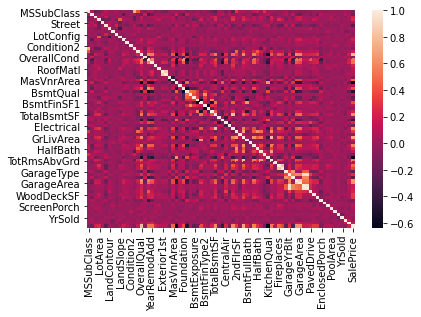

In [13]:
sns.heatmap(train.corr())

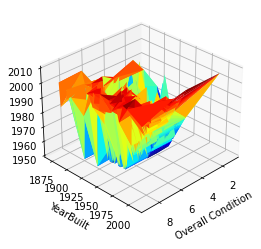

In [14]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_trisurf(train['OverallCond'], train['YearBuilt'], train['YearRemodAdd'], cmap=plt.cm.jet, linewidth=0.01)
ax.view_init(30,45)
plt.xlabel('Overall Condition')
plt.ylabel('YearBuilt')
plt.show()

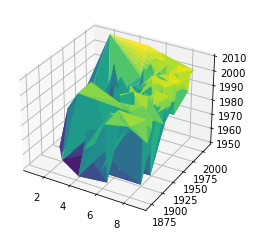

In [15]:
ax = plt.axes(projection='3d')
ax.plot_trisurf(train['OverallCond'], train['YearBuilt'], train['YearRemodAdd'],cmap='viridis', edgecolor='none');
plt.show()

# 6) Loading of Testing Dataset into Pandas DataFrame

In [16]:
X_test = pd.read_csv('test.csv',index_col="Id")

In [17]:
X_test.head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal


# 7) Preprocessing of Testing Dataset

In [18]:
# MSZoning_class_dict = {'A':1,'C':2,'FV':3,'I':4,'RH':5,'RL':6,'RP':7,'RM':8}
# Street_class_dict = {'Grvl':1,'Pave':2}
# LotShape_class_dict = {'Reg':1,'IR1':2,'IR2':3,'IR3':4}
# LandContour_class_dict = {'Lvl':1,'Bnk':2,'HLS':3,'Low':4}
# Utilities_class_dict = {'AllPub':1,'NoSewr':2,'NoSeWa':3,'ELO':4}
# LotConfig_class_dict = {'Inside':1,'Corner':2,'CulDSac':3,'FR2':4,'FR3':5,}
# LandSlope_class_dict = {'Gtl':1,'Mod':2,'Sev':3}
# Neighborhood_class_dict = {'Blmngtn':1,'Blueste':2,'BrDale':3,'BrkSide':4,'ClearCr':5,'CollgCr':6,'Crawfor':7,'Edwards':8,'Gilbert':9,'IDOTRR':10,'MeadowV':11,'Mitchel':12,'Names':13,'NoRidge':14,'NPkVill':15,'NridgHt':16,'NWAmes':17,'OldTown':18,'SWISU':19,'Sawyer':20,'SawyerW':21,'Somerst':22,'StoneBr':23,'Timber':24,'Veenker':25}
# Condition1_class_dict = {'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9}
# Condition2_class_dict = {'Artery':1,'Feedr':2,'Norm':3,'RRNn':4,'RRAn':5,'PosN':6,'PosA':7,'RRNe':8,'RRAe':9}
# BldgType_class_dict = {'1Fam':1,'2FmCon':2,'Duplx':3,'TwnhsE':4,'TwnhsI':5}
# HouseStyle_class_dict = {'1Story':1,'1.5Fin':2,'1.5Unf':3,'2Story':4,'2.5Fin':5,'2.5Unf':6,'SFoyer':7,'SLvl':8}
# RoofStyle_class_dict = {'Flat':1,'Gable':2,'Gambrel':3,'Hip':4,'Mansard':5,'Shed':6}
# RoofMatl_class_dict = {'ClyTile':1,'CompShg':2,'Membran':3,'Metal':4,'Roll':5,'Tar&Grv':6,'WdShake':7,'WdShngl':8}
# Exterior1st_class_dict = {'AsbShng':1,'AsphShn':2,'BrkComm':3,'BrkFace':4,'CBlock':5,'CemntBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17}
# Exterior2nd_class_dict = {'AsbShng':1,'AsphShn':2,'BrkComm':3,'BrkFace':4,'CBlock':5,'CemntBd':6,'HdBoard':7,'ImStucc':8,'MetalSd':9,'Other':10,'Plywood':11,'PreCast':12,'Stone':13,'Stucco':14,'VinylSd':15,'Wd Sdng':16,'WdShing':17}
# ExterQual_class_dict = {"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# ExterCond_class_dict = {"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# Foundation_class_dict = {'BrkTil':1,'CBlock':2,'PConc':3,'Slab':4,'Stone':5,'Wood':6}
# Heating_class_dict = {'Floor':1,'GasA':2,'GasW':3,'Grav':4,'OthW':5,'Wall':6}
# HeatingQC_class_dict = {"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# CentralAir_class_dict = {'N':0,'Y':1}
# KitchenQual_class_dict = {"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# Functional_class_dict = {'Typ':1,'Min1':2,'Min2':3,'Mod':4,'Maj1':5,'Maj2':6,'Sev':7,'Sal':8}
# PavedDrive_class_dict = {'Y':1,'P':2,'N':3}
# SaleType_class_dict = {'WD':1,'CWD':2,'VWD':3,'New':4,'COD':5,'Con':6,'ConLw':7,'ConLI':8,'ConLD':9,'Oth':10}
# SaleCondition_class_dict = {'Normal':1,'Abnorml':2,'AdjLand':3,'Alloca':4,'Family':5,'Partial':6}

In [19]:
# X_test['MSZoning'] = X_test['MSZoning'].map(MSZoning_class_dict)
# X_test['Street'] = X_test['Street'].map(Street_class_dict)
# X_test['LotShape'] = X_test['LotShape'].map(LotShape_class_dict)
# X_test['LandContour'] = X_test['LandContour'].map(LandContour_class_dict)
# X_test['Utilities'] = X_test['Utilities'].map(Utilities_class_dict)
# X_test['LotConfig'] = X_test['LotConfig'].map(LotConfig_class_dict)
# X_test['LandSlope'] = X_test['LandSlope'].map(LandSlope_class_dict)
# X_test['Neighborhood'] = X_test['Neighborhood'].map(Neighborhood_class_dict)
# X_test['Condition1'] = X_test['Condition1'].map(Condition1_class_dict)
# X_test['Condition2'] = X_test['Condition2'].map(Condition2_class_dict)
# X_test['BldgType'] = X_test['BldgType'].map(BldgType_class_dict)
# X_test['HouseStyle'] = X_test['HouseStyle'].map(HouseStyle_class_dict)
# X_test['RoofStyle'] = X_test['RoofStyle'].map(RoofStyle_class_dict)
# X_test['RoofMatl'] = X_test['RoofMatl'].map(RoofMatl_class_dict)
# X_test['Exterior1st'] = X_test['Exterior1st'].map(Exterior1st_class_dict)
# X_test['Exterior2nd'] = X_test['Exterior2nd'].map(Exterior2nd_class_dict)
# X_test['ExterQual'] = X_test['ExterQual'].map(ExterQual_class_dict)
# X_test['ExterCond'] = X_test['ExterCond'].map(ExterCond_class_dict)
# X_test['Foundation'] = X_test['Foundation'].map(Foundation_class_dict)
# X_test['Heating'] = X_test['Heating'].map(Heating_class_dict)
# X_test['HeatingQC'] = X_test['HeatingQC'].map(HeatingQC_class_dict)
# X_test['CentralAir'] = X_test['CentralAir'].map(CentralAir_class_dict)
# X_test['KitchenQual'] = X_test['KitchenQual'].map(KitchenQual_class_dict)
# X_test['Functional'] = X_test['Functional'].map(Functional_class_dict)
# X_test['PavedDrive'] = X_test['PavedDrive'].map(PavedDrive_class_dict)
# X_test['SaleType'] = X_test['SaleType'].map(SaleType_class_dict)
# X_test['SaleCondition'] = X_test['SaleCondition'].map(SaleCondition_class_dict)

In [20]:
# Alley_class_dict = {"Grvl":1,"Pave":2}
# MasVnrType_class_dict ={"BrkCmn":1,"BrkFace":2,"CBlock":3,"None":4,"Stone":5}
# BsmtQual_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# BsmtCond_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# BsmtExposure_class_dict ={"Gd":1,"Av":1,"Mn":2,"No":3}
# BsmtFinType1_class_dict ={"GLQ":1,"ALQ":1,"BLQ":2,"Rec":3,"LwQ":4,"Unf":5}
# BsmtFinType2_class_dict ={"GLQ":1,"ALQ":1,"BLQ":2,"Rec":3,"LwQ":4,"Unf":5}
# Electrical_class_dict ={"SBrkr":1,"FuseA":1,"FuseF":2,"FuseP":3,"Mix":4,}
# FireplaceQu_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# GarageType_class_dict ={"2Types":1,"Attchd":2,"Basment":3,"BuiltIn":4,"CarPort":5,"Detchd":6}
# GarageFinish_class_dict ={"Fin":1,"RFn":1,"Unf":2}
# GarageQual_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# GarageCond_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# PoolQC_class_dict ={"Ex":1,"Gd":2,"TA":3,"Fa":4,"Po":5}
# Fence_class_dict ={"GdPrv":1,"MnPrv":2,"GdWo":3,"MnWw":4}
# MiscFeature_class_dict ={"Elev":1,"Gar2":2,"Othr":3,"Shed":4,"TenC":5}

In [21]:
# X_test['Alley'] = X_test['Alley'].map(Alley_class_dict)
# X_test['MasVnrType'] = X_test['MasVnrType'].map(MasVnrType_class_dict)
# X_test['BsmtQual'] = X_test['BsmtQual'].map(BsmtQual_class_dict)
# X_test['BsmtCond'] = X_test['BsmtCond'].map(BsmtCond_class_dict)
# X_test['BsmtExposure'] = X_test['BsmtExposure'].map(BsmtExposure_class_dict)
# X_test['BsmtFinType1'] = X_test['BsmtFinType1'].map(BsmtFinType1_class_dict)
# X_test['BsmtFinType2'] = X_test['BsmtFinType2'].map(BsmtFinType2_class_dict)
# X_test['Electrical'] = X_test['Electrical'].map(Electrical_class_dict)
# X_test['FireplaceQu'] = X_test['FireplaceQu'].map(FireplaceQu_class_dict)
# X_test['GarageType'] = X_test['GarageType'].map(GarageType_class_dict)
# X_test['GarageFinish'] = X_test['GarageFinish'].map(GarageFinish_class_dict)
# X_test['GarageQual'] = X_test['GarageQual'].map(GarageQual_class_dict)
# X_test['GarageCond'] = X_test['GarageCond'].map(GarageCond_class_dict)
# X_test['PoolQC'] = X_test['PoolQC'].map(PoolQC_class_dict)
# X_test['Fence'] = X_test['Fence'].map(Fence_class_dict)
# X_test['MiscFeature'] = X_test['MiscFeature'].map(MiscFeature_class_dict)

In [22]:
# X_test['LotFrontage'].fillna(0,inplace=True)
# X_test['MasVnrArea'].fillna(0,inplace=True)
# X_test['MasVnrType'].fillna(0,inplace=True)
# X_test['BsmtQual'].fillna(0,inplace=True)
# X_test['BsmtCond'].fillna(0,inplace=True)
# X_test['BsmtExposure'].fillna(0,inplace=True)
# X_test['BsmtFinType1'].fillna(0,inplace=True)
# X_test['BsmtFinType2'].fillna(0,inplace=True)
# X_test['Electrical'].fillna(0,inplace=True)
# X_test['FireplaceQu'].fillna(0,inplace=True)
# X_test['GarageType'].fillna(0,inplace=True)
# X_test['GarageYrBlt'].fillna(0,inplace=True)
# X_test['GarageFinish'].fillna(0,inplace=True)
# X_test['GarageQual'].fillna(0,inplace=True)

In [23]:
# X_test.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace=True)

In [24]:
# X_test['MSZoning'].fillna(0,inplace=True)
# X_test['Utilities'].fillna(0,inplace=True)
# X_test['Neighborhood'].fillna(0,inplace=True)
# X_test['BldgType'].fillna(0,inplace=True)
# X_test['Exterior1st'].fillna(0,inplace=True)
# X_test['Exterior2nd'].fillna(0,inplace=True)
# X_test['BsmtFinSF1'].fillna(0,inplace=True)
# X_test['BsmtFinSF2'].fillna(0,inplace=True)
# X_test['BsmtUnfSF'].fillna(0,inplace=True)
# X_test['TotalBsmtSF'].fillna(0,inplace=True)
# X_test['BsmtFullBath'].fillna(0,inplace=True)
# X_test['BsmtHalfBath'].fillna(0,inplace=True)
# X_test['KitchenQual'].fillna(0,inplace=True)
# X_test['Functional'].fillna(0,inplace=True)
# X_test['GarageCars'].fillna(0,inplace=True)
# X_test['GarageArea'].fillna(0,inplace=True)
# X_test['GarageCond'].fillna(0,inplace=True)
# X_test['SaleType'].fillna(0,inplace=True)

In [25]:
# X_test.info()

# 8) Model Defining using Linear Regression

In [26]:
Linear = LinearRegression()

In [27]:
X = train.drop(['SalePrice'],axis=1)
y = train[['SalePrice']].values

In [28]:
X_train,test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [29]:
Rudy=Linear.fit(X_train,y_train) 

# 9) Final Prediction of Model

In [30]:
predict=Linear.predict(test)

In [31]:
predict.shape

(219, 1)

In [32]:
score = np.abs(np.mean(y_test-predict))
score/10

80.20162202988556

In [36]:
# Prediction = pd.DataFrame(predict)
# Prediction.head(10)

In [ ]:
# import os

In [ ]:
# Prediction.to_csv('Prediction.csv')